#### regression1_linear      p.162

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False  # 解決 plot 負號不能顯示問題
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']   # 解決 plot 中文不能顯示問題

In [2]:
# 讀入資料
train = np.loadtxt('click.csv', delimiter=',', skiprows=1)
print(train)

[[235. 591.]
 [216. 539.]
 [148. 413.]
 [ 35. 310.]
 [ 85. 308.]
 [204. 519.]
 [ 49. 325.]
 [ 25. 332.]
 [173. 498.]
 [191. 498.]
 [134. 392.]
 [ 99. 334.]
 [117. 385.]
 [112. 387.]
 [162. 425.]
 [272. 659.]
 [159. 400.]
 [159. 427.]
 [ 59. 319.]
 [198. 522.]]


In [3]:
train_x = train[:, 0]  # 第 0 行，取全部  -- x 軸（廣告費）


In [4]:
print(train_x)

[235. 216. 148.  35.  85. 204.  49.  25. 173. 191. 134.  99. 117. 112.
 162. 272. 159. 159.  59. 198.]


In [5]:
train_y = train[:, 1]  # 第 1 行，取全部  -- y 軸（點擊數）

In [6]:
print(train_y)

[591. 539. 413. 310. 308. 519. 325. 332. 498. 498. 392. 334. 385. 387.
 425. 659. 400. 427. 319. 522.]


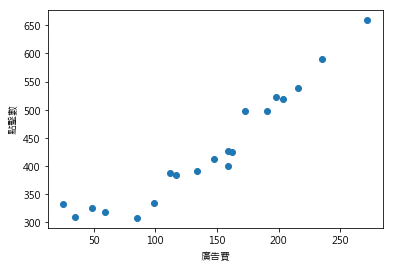

In [7]:
# 畫圖
plt.plot(train_x, train_y, 'o')
plt.xlabel('廣告費')
plt.ylabel('點擊數')
plt.show()

### 預測函數(p.30)： $$f_\theta(x) = \theta_0 + \theta_1x $$

###      $$ \theta_0：截距 \;\;\; \theta_1：斜率  $$

###  目標函數(p.33) -- 最小平方法： $$E(\theta) = \frac{1}{2}\sum_{i=1}^n{\left({y^{(i)} - f_\theta(x^{(i)}) }\right)}^2   $$

In [8]:
# 初始化參數
theta0 = np.random.rand()
theta1 = np.random.rand()

In [9]:
print(theta0)

0.8334359045093352


In [10]:
print(theta1)

0.7513744779097701


In [11]:
# 預測函數
def f(x):
    return theta0 + theta1 * x

# 目標函數
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

### 標準化或 Z-score 正規化  $$ z^{(i)} = \frac{x^{(i)} - \mu}{\sigma} $$

In [12]:
# 標準化
mu = train_x.mean()    # 平均數
sigma = train_x.std()  # 標準差

In [13]:
print(mu)

141.6


In [14]:
print(sigma)

66.98537153737374


In [15]:
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)  # 將 X 軸（廣告費）標準化
print(train_z)

[ 1.39433428  1.11069026  0.09554325 -1.59139223 -0.8449606   0.93154667
 -1.38239138 -1.74067856  0.46875906  0.73747445 -0.11345761 -0.63595975
 -0.36724436 -0.44188752  0.3045441   1.94669369  0.25975821  0.25975821
 -1.23310505  0.84197488]


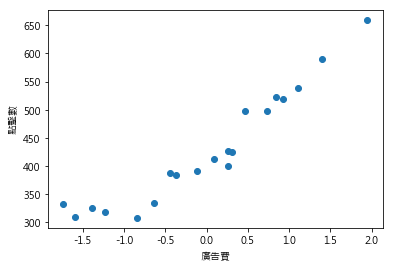

In [16]:
plt.plot(train_z, train_y, 'o')
plt.xlabel('廣告費')
plt.ylabel('點擊數')
plt.show()

# 標準化後，x 軸的刻度變小了

### $$ \theta_0 := \theta_0 - \eta\sum_{i=1}^n{\left(f_\theta(x^{(i)}) - {y^{(i)}}\right)}  $$

### $$ \theta_1 := \theta_1 - \eta\sum_{i=1}^n{\left(f_\theta(x^{(i)}) - {y^{(i)}}\right)}x^{(i)} $$

In [17]:
# 學習率，自己設
ETA = 1e-3

# 誤差的差分
diff = 1

# 更新次數
count = 0

error = E(train_z, train_y)  # 目標函數

# 重複參數的更新，直到誤差的差分變成 0.01 以下為止
while diff > 1e-2:
    # 將更新結果儲存於臨時變數
    tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)
    
    # 更新參數
    theta0 = tmp_theta0
    theta1 = tmp_theta1
    
    # 計算與前一項誤差的差分
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error
    
    # 輸出日誌
    count += 1
    log = '{}次: theta0 = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))


1次: theta0 = 9.400, theta1 = 2.606, 差分 = 76053.1656
2次: theta0 = 17.795, theta1 = 4.423, 差分 = 73041.4603
3次: theta0 = 26.022, theta1 = 6.204, 差分 = 70149.0184
4次: theta0 = 34.084, theta1 = 7.950, 差分 = 67371.1173
5次: theta0 = 41.986, theta1 = 9.661, 差分 = 64703.2211
6次: theta0 = 49.729, theta1 = 11.337, 差分 = 62140.9735
7次: theta0 = 57.317, theta1 = 12.980, 差分 = 59680.1910
8次: theta0 = 64.754, theta1 = 14.590, 差分 = 57316.8554
9次: theta0 = 72.042, theta1 = 16.168, 差分 = 55047.1079
10次: theta0 = 79.184, theta1 = 17.714, 差分 = 52867.2425
11次: theta0 = 86.183, theta1 = 19.229, 差分 = 50773.6997
12次: theta0 = 93.043, theta1 = 20.714, 差分 = 48763.0611
13次: theta0 = 99.765, theta1 = 22.169, 差分 = 46832.0439
14次: theta0 = 106.353, theta1 = 23.596, 差分 = 44977.4950
15次: theta0 = 112.809, theta1 = 24.993, 差分 = 43196.3862
16次: theta0 = 119.135, theta1 = 26.363, 差分 = 41485.8093
17次: theta0 = 125.336, theta1 = 27.705, 差分 = 39842.9712
18次: theta0 = 131.412, theta1 = 29.021, 差分 = 38265.1896
19次: theta0 = 137.36

In [18]:
# 繪圖來確認
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [19]:
print(f(x))   # f(x) = theta0 + theta1 * x

[148.66126936 154.32468679 159.98810422 165.65152164 171.31493907
 176.9783565  182.64177392 188.30519135 193.96860878 199.6320262
 205.29544363 210.95886106 216.62227849 222.28569591 227.94911334
 233.61253077 239.27594819 244.93936562 250.60278305 256.26620047
 261.9296179  267.59303533 273.25645276 278.91987018 284.58328761
 290.24670504 295.91012246 301.57353989 307.23695732 312.90037474
 318.56379217 324.2272096  329.89062703 335.55404445 341.21746188
 346.88087931 352.54429673 358.20771416 363.87113159 369.53454901
 375.19796644 380.86138387 386.5248013  392.18821872 397.85163615
 403.51505358 409.178471   414.84188843 420.50530586 426.16872328
 431.83214071 437.49555814 443.15897557 448.82239299 454.48581042
 460.14922785 465.81264527 471.4760627  477.13948013 482.80289755
 488.46631498 494.12973241 499.79314984 505.45656726 511.11998469
 516.78340212 522.44681954 528.11023697 533.7736544  539.43707182
 545.10048925 550.76390668 556.4273241  562.09074153 567.75415896
 573.417576

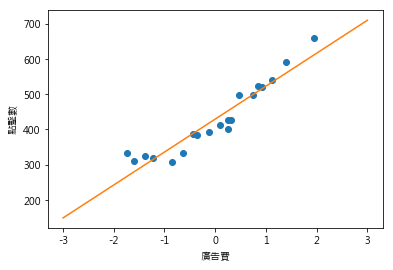

In [20]:
plt.plot(train_z, train_y, 'o')  # 點 
plt.plot(x, f(x))  # 直線
plt.xlabel('廣告費')
plt.ylabel('點擊數')
plt.show()

In [21]:
f(standardize(100))

370.9673177122929

In [22]:
f(standardize(200))

510.46999628316

In [23]:
f(standardize(300))

649.9726748540271

### 多項式迴歸的程式    p.165

### $$f_\theta(x) = \theta_0 + \theta_1x + \theta_2x^2 $$

In [24]:
# 初始化參數
theta = np.random.rand(3)
print(theta)

[0.70452642 0.37140285 0.06713816]


In [25]:
print(train_z)

[ 1.39433428  1.11069026  0.09554325 -1.59139223 -0.8449606   0.93154667
 -1.38239138 -1.74067856  0.46875906  0.73747445 -0.11345761 -0.63595975
 -0.36724436 -0.44188752  0.3045441   1.94669369  0.25975821  0.25975821
 -1.23310505  0.84197488]


In [26]:
print(train_z.shape[0])

20


In [27]:
# 建立學習資料的矩陣
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2]).T

X = to_matrix(train_z)
print(X)

[[ 1.          1.39433428  1.94416809]
 [ 1.          1.11069026  1.23363286]
 [ 1.          0.09554325  0.00912851]
 [ 1.         -1.59139223  2.53252924]
 [ 1.         -0.8449606   0.71395842]
 [ 1.          0.93154667  0.8677792 ]
 [ 1.         -1.38239138  1.91100592]
 [ 1.         -1.74067856  3.02996185]
 [ 1.          0.46875906  0.21973506]
 [ 1.          0.73747445  0.54386856]
 [ 1.         -0.11345761  0.01287263]
 [ 1.         -0.63595975  0.4044448 ]
 [ 1.         -0.36724436  0.13486842]
 [ 1.         -0.44188752  0.19526458]
 [ 1.          0.3045441   0.09274711]
 [ 1.          1.94669369  3.78961632]
 [ 1.          0.25975821  0.06747433]
 [ 1.          0.25975821  0.06747433]
 [ 1.         -1.23310505  1.52054807]
 [ 1.          0.84197488  0.70892169]]


### $$\theta^Tx = \theta_0x_0 + \theta_1x_1 + \theta_2x_2 + .... + \theta_nx_n  $$

### $$f_\theta(x) = \theta^Tx $$

In [28]:
# 預測函數
def f(x):
    return np.dot(x, theta)

In [29]:
# 誤差的差分
diff = 1

# 重複學習
error = E(X, train_y)  # 目標函數

# 重複參數的更新，直到誤差的差分變成 0.01 以下為止
while diff > 1e-2:
    # 更新參數
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    # 計算與前一項誤差的差分
    current_error = E(X, train_y)  # 
    diff = error - current_error
    error = current_error

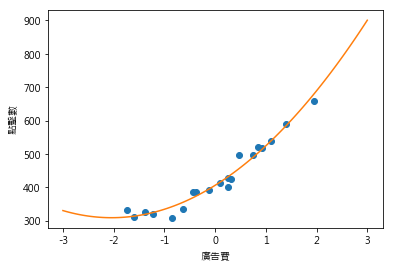

In [30]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.xlabel('廣告費')
plt.ylabel('點擊數')
plt.show()

### 均方誤差     p.170

### $$ \frac{1}{n}\sum_{i=1}^n{\left({y^{(i)} - f_\theta(x^{(i)}) }\right)}^2   $$

### 測試資料有 n 筆，$y^{(i)}$ 為點擊數， $x^{(i)}$ 為廣告費


In [31]:
# 均方誤差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

In [32]:
# 將參數以隨機方式初始化
theta = np.random.rand(3)
print(theta)

[0.92411626 0.406951   0.23560813]


In [33]:
# 均方誤差的歷史記錄
errors = []

In [34]:
# 誤差的差分
diff = 1

In [35]:
# 重複學習
errors.append(MSE(X, train_y))

# 重複參數的更新，直到誤差的差分變成 0.01 以下為止
while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]
    

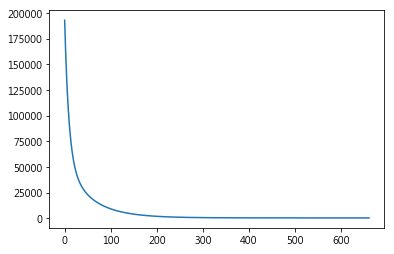

In [36]:
# 繪製誤差
x = np.arange(len(errors))

plt.plot(x, errors)
plt.show()

### 隨機梯度下降法  p.171

### $$ \theta_j := \theta_j - \eta{\left(f_\theta(x^{(k)}) - {y^{(k)}}\right)}x_j^{(k)} $$

In [37]:
# 將參數以隨機方式初始化
theta = np.random.rand(3)

In [38]:
# 均方誤差的歷史記錄
errors = []

In [39]:
# 誤差的差分
diff = 1

In [40]:
# 重複學習
errors.append(MSE(X, train_y))

# 重複參數的更新，直到誤差的差分變成 0.01 以下為止
while diff > 1e-2:
    # 準備排列學習資料所需的隨機排列組合
    p = np.random.permutation(X.shape[0])
    # 將學習資料以隨機的方式取出並以隨機梯度下降法來更新參數
    for x, y in zip(X[p,:], train_y[p]):
        theta = theta - ETA * (f(x) - y) * x
    # 計算與前一項誤差的差分
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]

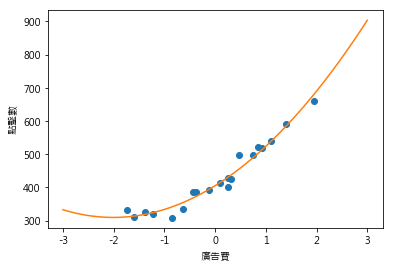

In [41]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.xlabel('廣告費')
plt.ylabel('點擊數')
plt.show()

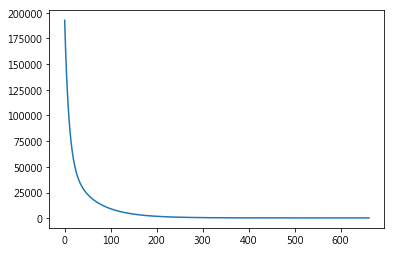

In [42]:
# 繪製誤差
x = np.arange(len(errors))

plt.plot(x, errors)
plt.show()